# Predicting Audience Rating Based on Movie Features

Sowrav Krishnan K

21-12-2024

## Table of Contents

#### > Problem Statement

#### > Objective

#### > Data Collection

#### > Data Description 

#### > EDA (Exploratory Data Analysis)

#### > Data Preprocessing  

#### > Visualization  

#### > Feature Engineering  

#### > Data Splitting  

#### > Model Training and Evaluation 

#### > Result

#### > Limitations

#### > Conclusion

#### > Future Work

## Problem Statement

It is crucial to understand how various features of a movie—such as genre, runtime, cast, director and more —affect the audience's rating. By gaining insights into these relationships, movie studios can make informed decisions about production and marketing strategies, while audiences can better anticipate how well a movie might be received. This understanding will also enable prediction of audience ratings for future movies based on their characteristics.

## Objective

The goal of this project is to build a predictive model that can forecast the 'audience_rating' of a movie based on various features available in the given dataset

## Data collection

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew,kurtosis

In [2]:
df=pd.read_excel('D:\\zoho dataset\\Rotten_Tomatoes_Movies3.xls', engine='xlrd')
df

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0


## Data Description 

The dataset contains 16,638 rows and 16 columns. It is sourced from an American-based website called Rotten Tomatoes, which provides a platform for both critics and audiences to share their feedback on movies.

The ratings from critics are represented by two columns:

>'tomatometer_status': This column indicates whether the movie is rated as Fresh, Rotten, or Certified Fresh by critics.

>'tomatometer_rating': This column contains the numerical rating given by critics, ranging from 0 to 100.

The rating from the audience is given in the column 'audience_rating', which is also a numerical score in the range of 0 to 100, similar to the tomatometer_rating. This will be our target variable for prediction.

Other features in the dataset include columns like 'rating', 'genre', 'director', 'cast', and other movie-related information that can be used to help predict the audience_rating.

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

Most of the features are categorical in nature. 'runtime_in_minutes','tomatometer_rating','tomatometer_count','audience_rating' are the only numerical columns and there are null values in some columns.

In [4]:
df.describe(include='all')

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
count,16638,16614,8309,16638,16621,16524,15289,16354,15823,16636,16483.000000,16222,16638,16638.000000,16638.000000,16386.000000
unique,16106,16613,8307,8,1080,8314,12121,16326,NaN,NaN,NaN,2886,3,NaN,NaN,NaN
top,Home,An adaptation of the Broadway drama about Prin...,"Extinction has a few intriguing ideas, but the...",R,Drama,Alfred Hitchcock,Woody Allen,Chris Rock,NaN,NaN,NaN,Paramount Pictures,Rotten,NaN,NaN,NaN
freq,5,2,2,6136,1727,36,33,4,NaN,NaN,NaN,497,7233,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,NaN,NaN,60.466522,56.607104,60.470829
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,NaN,NaN,0.000000,5.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,NaN,NaN,38.000000,12.000000,45.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,NaN,NaN,66.000000,28.000000,62.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,NaN,NaN,86.000000,76.000000,77.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,NaN,NaN,100.000000,497.000000,100.000000


In [5]:
df.nunique()

movie_title           16106
movie_info            16613
critics_consensus      8307
rating                    8
genre                  1080
directors              8314
writers               12121
cast                  16326
in_theaters_date       5586
on_streaming_date      2260
runtime_in_minutes      201
studio_name            2886
tomatometer_status        3
tomatometer_rating      101
tomatometer_count       393
audience_rating          98
dtype: int64

In [6]:
columns=df.columns
columns

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [7]:
for i in columns:
    x=df[i].unique()
    print({i},':')
    print(x)
    print()

{'movie_title'} :
['Percy Jackson & the Olympians: The Lightning Thief' 'Please Give' 10 ...
 'Zorba the Greek' 'Zulu' 'Zulu Dawn']

{'movie_info'} :
["A teenager discovers he's the descendant of a Greek god and sets out on an adventure to settle an on-going battle between the gods."
 "Kate has a lot on her mind. There's the ethics problem of buying furniture on the cheap at estate sales and marking it up at her trendy Manhattan store. And how much markup can she get away with? There's the materialism problem of not wanting her teenage daughter to want the expensive things that Kate wants. There's the marriage problem of sharing a partnership in parenting, business and life with her husband Alex but sensing doubt nibbling at the foundations. And, there's Kate's free-floating 21st century malaise -- the problem of how to live well and be a good person when poverty, homelessness, and sadness are always right outside the door. Plus, there's the neighbors: cranky, elderly Andra and the two

In [8]:
df.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

There are many null values across multiple columns, we need to handle it with appropriate approach.

## Data Preprocessing

### Handling missing values

In [9]:
df.drop(columns=['movie_title'], inplace=True)
df.drop(columns=['movie_info'], inplace=True)
df.drop(columns=['critics_consensus'], inplace=True)


'movie_title' and 'movie_info' - is unique for every movie hence it is not a contributing factor when it comes to 'audience_rating'

'critics_consensus' - the 'tomatometer_status' and 'tomatometer_status' are derived from this hence we are neglecting this feature.

In [10]:
df.loc[df['rating'] == 'PG-13)', 'rating'] = 'PG-13'
df.loc[df['rating'] == 'R)', 'rating'] = 'R'

Correcting some spelling errors in the 'rating' column.

In [11]:
df = df.dropna(subset=['directors', 'writers','cast'])
df

,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum","Tim Allen, Courteney Cox, Chevy Chase, Spencer...",2006-08-11,2007-09-02,88.0,Sony Pictures Entertainment,Rotten,3,66,33.0
16633,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0
16634,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0
16636,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0


Dropping rows with null values in columns 'directors', 'writers','cast'.

In [12]:
df.isnull().sum()

rating                  0
genre                  13
directors               0
writers                 0
cast                    0
in_theaters_date      632
on_streaming_date       0
runtime_in_minutes    139
studio_name           263
tomatometer_status      0
tomatometer_rating      0
tomatometer_count       0
audience_rating       171
dtype: int64

In [13]:
df = df.copy()

In [14]:
df['in_theaters_date'] = df['in_theaters_date'].fillna(df['on_streaming_date'])

There are null values in 'in_theaters_date' but not in 'on_streaming_date' column. This is because there are movies which are directly streamed to OTT. So for handling missing values, merging the 2 columns and calling it as just 'release_date'. The reviews and ratings starts from the initial release date. Post theatrical release, streaming release doesn't have much impact on the ratings and reviews.

In [15]:
df.loc[:, 'release_date_day'] = df['in_theaters_date'].dt.day_name()
df.loc[:, 'release_date_month'] = df['in_theaters_date'].dt.month_name()
df.loc[:, 'release_date_year'] = df['in_theaters_date'].dt.year

Deriving required information like day, month and year from the date column.

In [16]:
df.drop(columns=['in_theaters_date'], inplace=True)

In [17]:
df.drop(columns=['on_streaming_date'], inplace=True)

As 'release_date_day' ,'release_date_month' and 'release_date_year' has the required information regarding dates, dropping 'in_theaters_date' and 'on_streaming_date' columns.

In [18]:
df.isnull().sum()

rating                  0
genre                  13
directors               0
writers                 0
cast                    0
runtime_in_minutes    139
studio_name           263
tomatometer_status      0
tomatometer_rating      0
tomatometer_count       0
audience_rating       171
release_date_day        0
release_date_month      0
release_date_year       0
dtype: int64

In [19]:
df

,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,release_date_day,release_date_month,release_date_year
0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,20th Century Fox,Rotten,49,144,53.0,Friday,February,2010
1,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,Friday,April,2010
2,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,Waner Bros.,Fresh,68,22,53.0,Friday,October,1979
3,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,Criterion Collection,Certified Fresh,100,51,97.0,Saturday,April,1957
4,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,Disney,Fresh,89,27,74.0,Friday,January,1954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum","Tim Allen, Courteney Cox, Chevy Chase, Spencer...",88.0,Sony Pictures Entertainment,Rotten,3,66,33.0,Friday,August,2006
16633,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",104.0,MCA Universal Home Video,Rotten,56,9,74.0,Friday,October,1981
16634,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,Friday,March,2016
16636,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",139.0,Paramount Pictures,Fresh,95,21,91.0,Wednesday,June,1964


In [20]:
df['genre'].value_counts()

genre
Drama                                                                            1663
Comedy                                                                           1161
Comedy, Drama                                                                     799
Drama, Mystery & Suspense                                                         672
Art House & International, Drama                                                  536
                                                                                 ... 
Horror, Gay & Lesbian                                                               1
Art House & International, Drama, Mystery & Suspense, Gay & Lesbian                 1
Comedy, Kids & Family, Science Fiction & Fantasy, Romance                           1
Drama, Musical & Performing Arts, Science Fiction & Fantasy, Special Interest       1
Animation, Drama, Romance                                                           1
Name: count, Length: 1024, dtype: int64

In [21]:
df['genre'] = df['genre'].fillna('Drama')

Filling null  values in 'genre' with the mode value as it is a categorical column

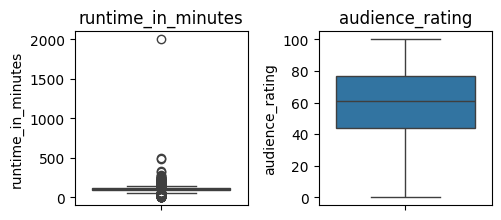

In [22]:
plt.figure(figsize=(10, 10))
num_cols = df[["runtime_in_minutes","audience_rating"]]

for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1) 
    sns.boxplot(df[col]) 
    plt.title(col)  

plt.tight_layout()

plt.show()

Checking for outliers in numerical columns to decide which approach we should pick to handle missing values.

In [23]:
df['runtime_in_minutes'] = df['runtime_in_minutes'].fillna(df['runtime_in_minutes'].median())

As there are outliers in the 'runtime_in_minutes' we are using median to fill null values as it is less sensitive to outliers.

In [24]:
df['audience_rating'] = df['audience_rating'].fillna(df['audience_rating'].mean())

As there are no outliers in the 'audience_rating' we are using mean to fill the null values. 

In [25]:
df["studio_name"].value_counts()

studio_name
Warner Bros. Pictures               486
Paramount Pictures                  480
Universal Pictures                  467
20th Century Fox                    410
Sony Pictures Home Entertainment    364
                                   ... 
Paulist Productions                   1
Fundamental Films                     1
Honlodge Productions                  1
Every Tribe Entertainment             1
Tango Entertainment                   1
Name: count, Length: 2586, dtype: int64

In [26]:
df.loc[:, 'studio_name'] = df['studio_name'].fillna("Warner Bros. Pictures")

Using the mode value to fill null values in "studio_name"

In [27]:
df.isnull().sum()

rating                0
genre                 0
directors             0
writers               0
cast                  0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
release_date_day      0
release_date_month    0
release_date_year     0
dtype: int64

In [28]:
df

,rating,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,release_date_day,release_date_month,release_date_year
0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,20th Century Fox,Rotten,49,144,53.0,Friday,February,2010
1,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,Friday,April,2010
2,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,Waner Bros.,Fresh,68,22,53.0,Friday,October,1979
3,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,Criterion Collection,Certified Fresh,100,51,97.0,Saturday,April,1957
4,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,Disney,Fresh,89,27,74.0,Friday,January,1954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum","Tim Allen, Courteney Cox, Chevy Chase, Spencer...",88.0,Sony Pictures Entertainment,Rotten,3,66,33.0,Friday,August,2006
16633,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",104.0,MCA Universal Home Video,Rotten,56,9,74.0,Friday,October,1981
16634,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,Friday,March,2016
16636,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",139.0,Paramount Pictures,Fresh,95,21,91.0,Wednesday,June,1964


### Outlier Removal

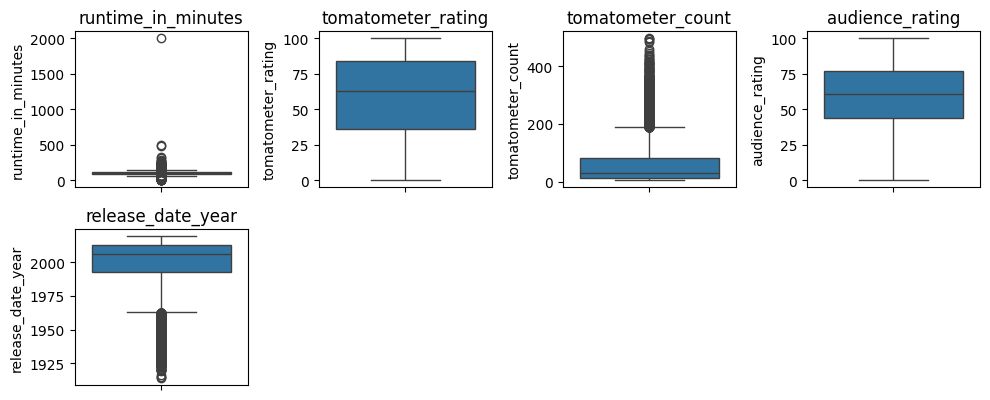

In [29]:
plt.figure(figsize=(10, 10))
num_cols = df.select_dtypes(include = ["int64","float64","int32"]) 

for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1) 
    sns.boxplot(df[col]) 
    plt.title(col)  

plt.tight_layout()

plt.show()

Using box plots to visualise outliers in numerical columns. 'runtime_in_minutes', 'tomatometer_count', 'release_date_year' has outliers. 

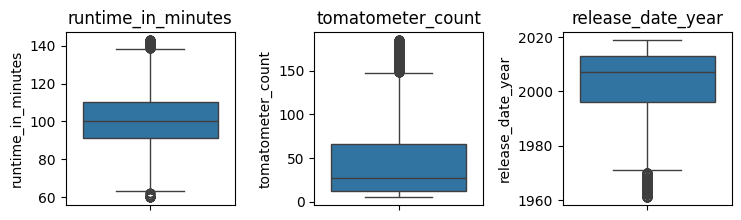

In [30]:
outliers = ["runtime_in_minutes", "tomatometer_count","release_date_year"]

plt.figure(figsize=(10, 10))

for i, col in enumerate(outliers):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UW = Q3 + 1.5 * IQR
    LW = Q1 - 1.5 * IQR
    
    outliers_mask = (df[col] < LW) | (df[col] > UW)
    
    df = df.loc[~outliers_mask]
    
    plt.subplot(5, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Using IQR method to remove outliers. Even after removal there are still outliers present but trying to remove further may lead to losing valuable information.

## Visualisation

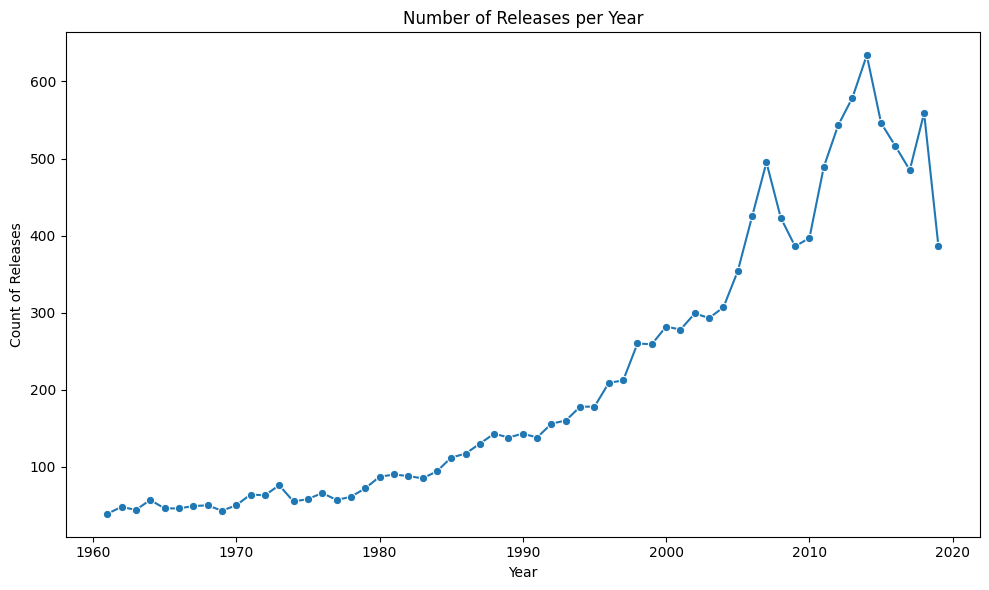

In [31]:
year_counts = df['release_date_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')

plt.title('Number of Releases per Year')
plt.xlabel('Year')
plt.ylabel('Count of Releases')

plt.tight_layout()
plt.show()

There is a general increasing trend when it comes to number of releases per year. However there is a steep decline in the year 2020 due to covid.

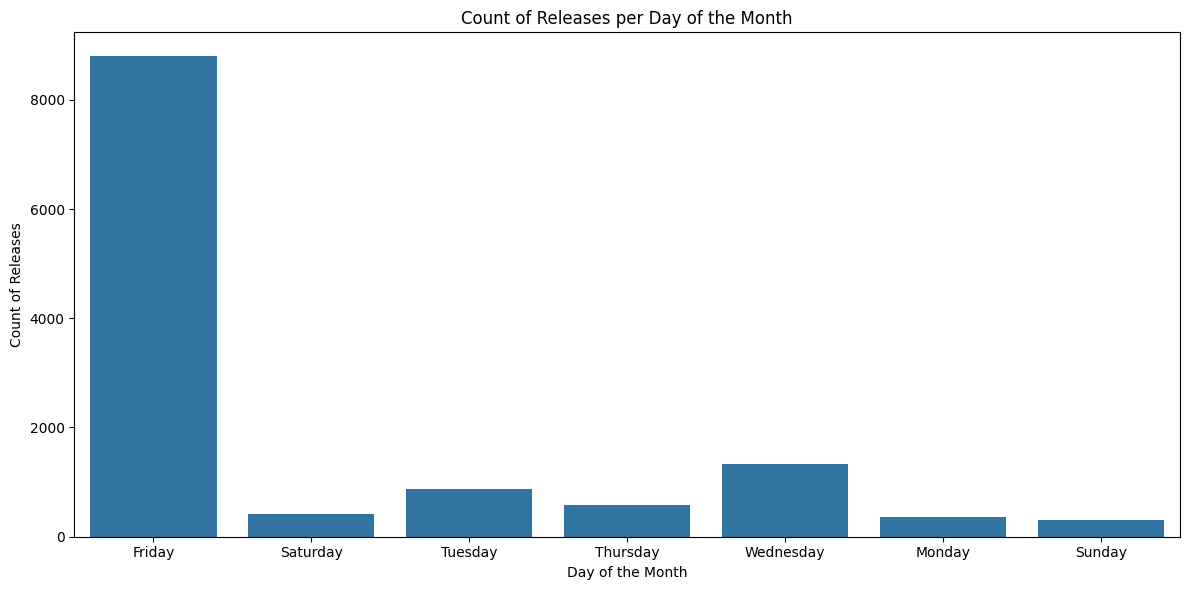

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='release_date_day', data=df)

plt.title('Count of Releases per Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count of Releases')

plt.tight_layout()
plt.show()

It's clear that movies generally release on friday so that they can benefit from the weekend holidays and gather maximum number of audience while the movie is still new.

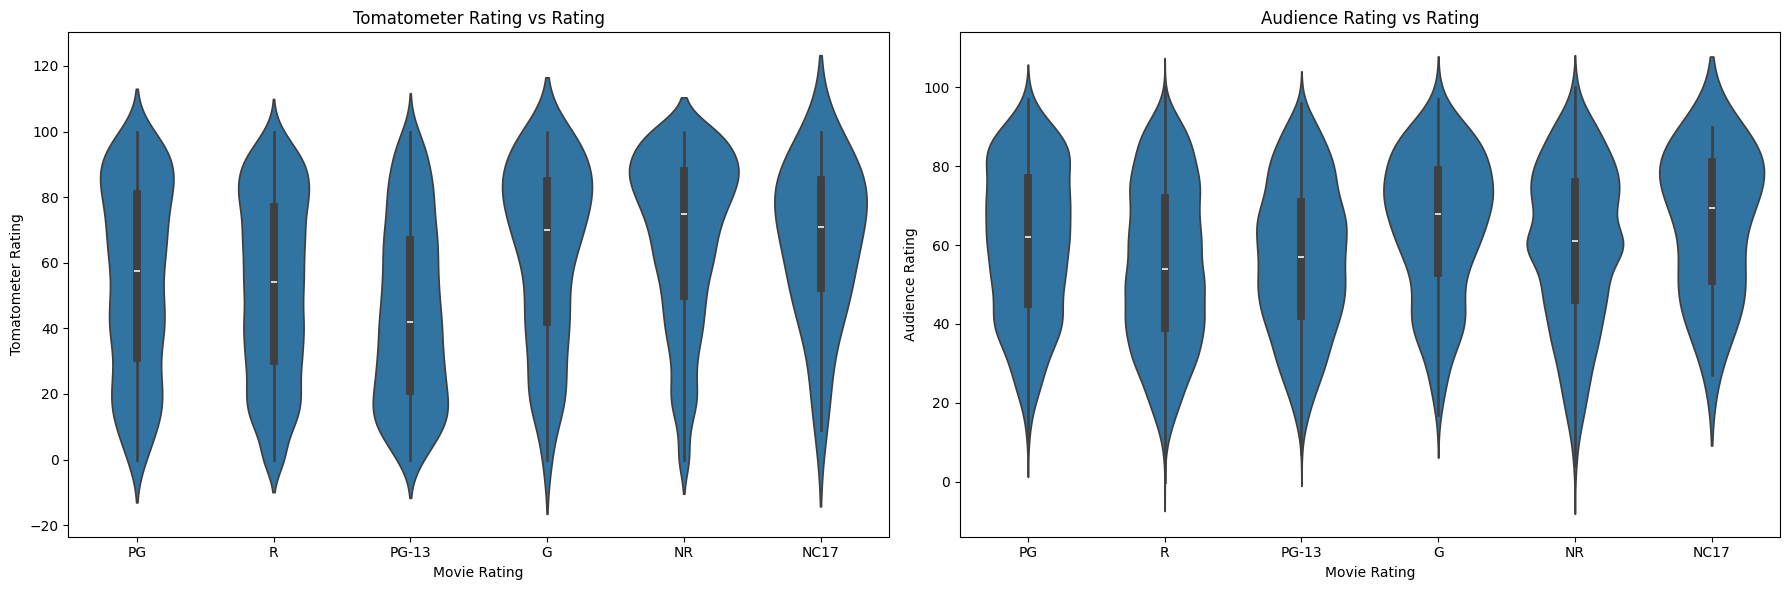

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.violinplot(x='rating', y='tomatometer_rating', data=df, ax=axes[0])
axes[0].set_title('Tomatometer Rating vs Rating')
axes[0].set_xlabel('Movie Rating')
axes[0].set_ylabel('Tomatometer Rating')

sns.violinplot(x='rating', y='audience_rating', data=df, ax=axes[1])
axes[1].set_title('Audience Rating vs Rating')
axes[1].set_xlabel('Movie Rating')
axes[1].set_ylabel('Audience Rating')

plt.tight_layout()
plt.show()

G rating means suitable for all audience and R rating is for 18 and above. The rating is more favourable towards G rated movies than R rated.

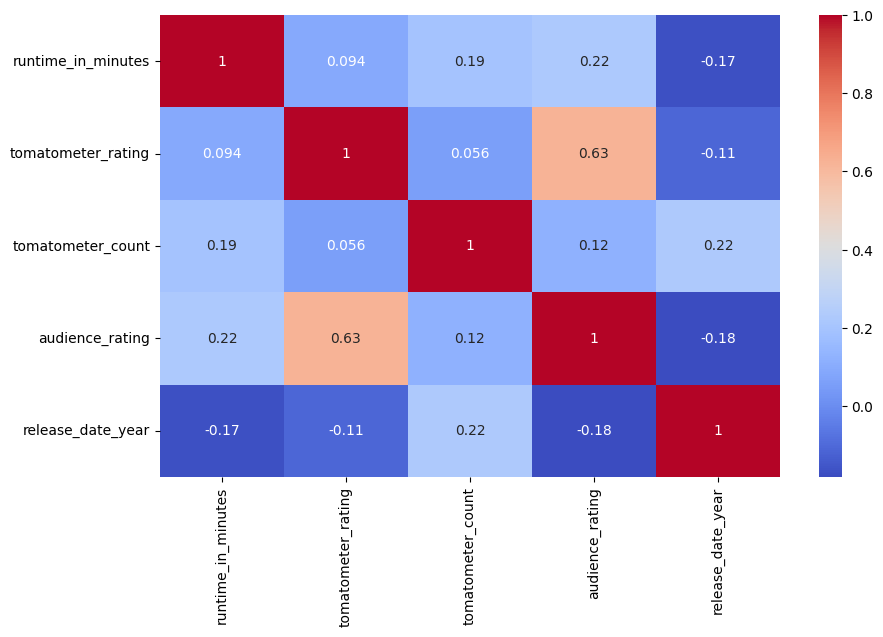

In [34]:
plt.figure(figsize=(10, 6))
plot_df = df[['runtime_in_minutes','tomatometer_rating','tomatometer_count','audience_rating','release_date_year']]
corr = plot_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

The correlation plot indicates that there is no multicollinearity between independent variables.

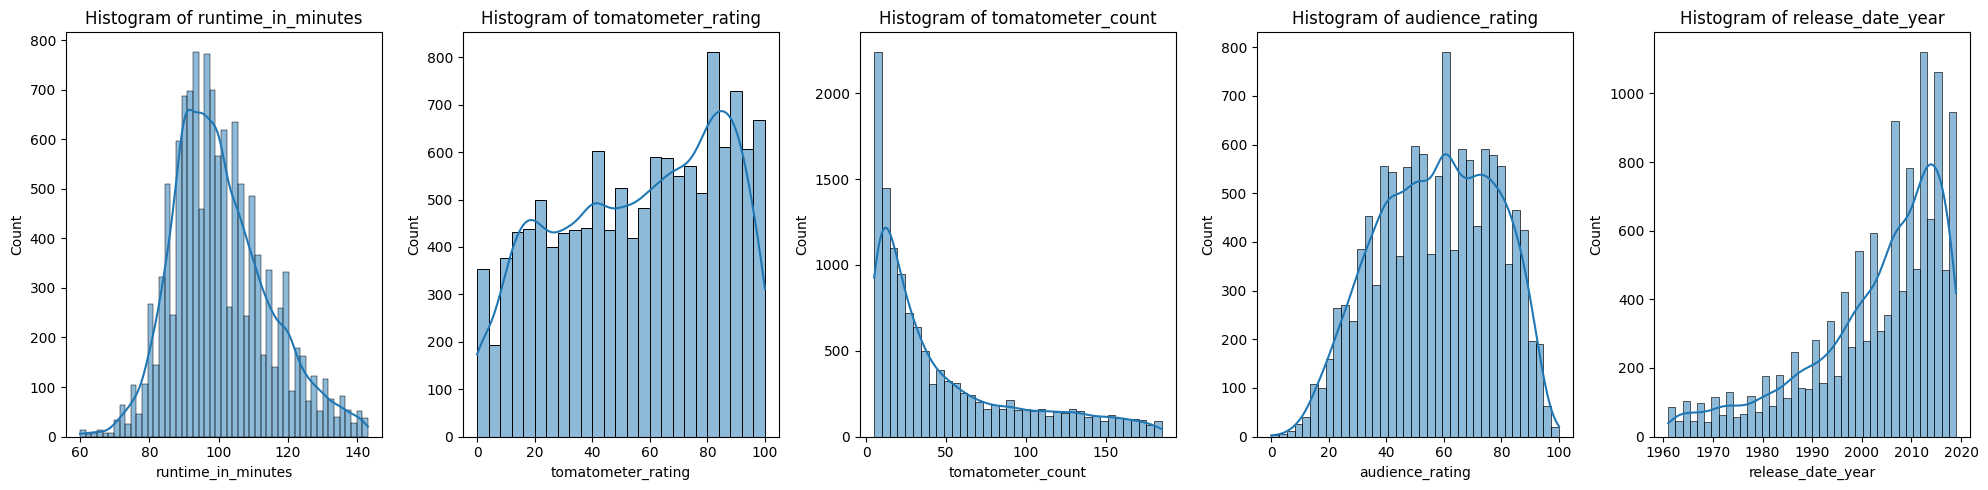

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
axes = axes.flatten()
for i, column in enumerate(['runtime_in_minutes','tomatometer_rating','tomatometer_count','audience_rating','release_date_year']):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [36]:
columns = ['runtime_in_minutes','tomatometer_rating','tomatometer_count','audience_rating','release_date_year']
for column in columns:
    skew_val = df[column].skew()
    kurt_val = df[column].kurtosis()
    print(f"Column: {column}")
    print(f"Skewness: {skew_val}")
    print(f"Kurtosis: {kurt_val}")
    print("-" * 20)

Column: runtime_in_minutes
Skewness: 0.5374268492461626
Kurtosis: 0.1761832470373248
--------------------
Column: tomatometer_rating
Skewness: -0.22794806826165084
Kurtosis: -1.1198514605126653
--------------------
Column: tomatometer_count
Skewness: 1.2288156455020005
Kurtosis: 0.4224532494638229
--------------------
Column: audience_rating
Skewness: -0.1631417840858215
Kurtosis: -0.841557444643688
--------------------
Column: release_date_year
Skewness: -1.105429046331827
Kurtosis: 0.5600788527424463
--------------------


The 'tomatometer_count' appears to be highly skewed compared to other columns, so doing logarithmic transformation to reduce the skewness and bring it to an acceptable range.

In [37]:
df['tomatometer_count'] = np.log1p(df['tomatometer_count'])

In [38]:
columns = ['runtime_in_minutes','tomatometer_rating','tomatometer_count','audience_rating','release_date_year']
for column in columns:
    skew_val = df[column].skew()
    kurt_val = df[column].kurtosis()
    print(f"Column: {column}")
    print(f"Skewness: {skew_val}")
    print(f"Kurtosis: {kurt_val}")
    print("-" * 20)

Column: runtime_in_minutes
Skewness: 0.5374268492461626
Kurtosis: 0.1761832470373248
--------------------
Column: tomatometer_rating
Skewness: -0.22794806826165084
Kurtosis: -1.1198514605126653
--------------------
Column: tomatometer_count
Skewness: 0.08270620488422671
Kurtosis: -1.13379385427352
--------------------
Column: audience_rating
Skewness: -0.1631417840858215
Kurtosis: -0.841557444643688
--------------------
Column: release_date_year
Skewness: -1.105429046331827
Kurtosis: 0.5600788527424463
--------------------


'release_date_year' is also having higher skew value but the transformation methods couldn't reduce it because the column is having values with high magnitude. The acceptable range of skewness is -1 to +1 so as it is just above -1 we are keeping it as it is and proceeding further.

## Feature Engineering

In [39]:
from sklearn.preprocessing import StandardScaler
# Assuming 'target' is the target variable that should not be scaled
target_column = 'audience_rating'

# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Exclude the target variable from the numerical columns
numerical_cols = numerical_cols[numerical_cols != target_column]

# Apply Standard Scaling to the numerical columns excluding the target variable
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df = pd.get_dummies(df, columns=['rating','tomatometer_status','release_date_day','release_date_month'])

Using standard scaler to scale numerical columns.

In [40]:
df = pd.get_dummies(df, columns=['rating', 'tomatometer_status','release_date_day','release_date_month'])

Using one hot encoding for 'rating','tomatometer_status','release_date_day','release_date_month'.

In [41]:
import category_encoders as ce

# Select categorical columns in the DataFrame
cols = df.select_dtypes(include=['object']).columns

# Initialize the TargetEncoder
encoder = ce.TargetEncoder(cols=cols)  # Specify the categorical columns for encoding

# Fit the encoder on the categorical columns and transform them
df[cols] = encoder.fit_transform(df[cols], df['audience_rating'])


Using Target Encoding for the other columns as it has many unique values where one-hot encoding would create too many features.

In [42]:
df.head()

,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_rating,tomatometer_count,audience_rating,release_date_year,...,release_date_month_December,release_date_month_February,release_date_month_January,release_date_month_July,release_date_month_June,release_date_month_March,release_date_month_May,release_date_month_November,release_date_month_October,release_date_month_September
0,57.963883,58.843662,56.881267,56.881267,-1.264469,56.632867,-0.229322,1.553150,53.0,0.525119,...,False,True,False,False,False,False,False,False,False,False
1,51.812257,57.815363,56.941833,58.312460,-0.759984,70.574219,1.074476,1.524948,64.0,0.525119,...,False,False,False,False,False,False,False,False,False,False
2,53.219953,60.037655,57.535282,56.881267,1.257959,56.881267,0.440196,-0.303106,53.0,-1.745881,...,False,False,False,False,False,False,False,False,True,False
5,63.117311,56.064078,54.799532,54.799532,0.609334,57.265631,-1.674070,1.580585,37.0,0.378603,...,False,False,False,False,False,True,False,False,False,False
8,58.541152,61.304955,61.304955,61.304955,0.176918,59.913386,-1.251217,-1.046721,87.0,-0.060946,...,False,False,False,False,False,False,False,False,False,True


## Data Splitting

In [43]:
x=df.drop("audience_rating", axis=1)
y=df['audience_rating']

In [44]:
x

,genre,directors,writers,cast,runtime_in_minutes,studio_name,tomatometer_rating,tomatometer_count,release_date_year,rating_G,...,release_date_month_December,release_date_month_February,release_date_month_January,release_date_month_July,release_date_month_June,release_date_month_March,release_date_month_May,release_date_month_November,release_date_month_October,release_date_month_September
0,57.963883,58.843662,56.881267,56.881267,-1.264469,56.632867,-0.229322,1.553150,0.525119,False,...,False,True,False,False,False,False,False,False,False,False
1,51.812257,57.815363,56.941833,58.312460,-0.759984,70.574219,1.074476,1.524948,0.525119,False,...,False,False,False,False,False,False,False,False,False,False
2,53.219953,60.037655,57.535282,56.881267,1.257959,56.881267,0.440196,-0.303106,-1.745881,False,...,False,False,False,False,False,False,False,False,True,False
5,63.117311,56.064078,54.799532,54.799532,0.609334,57.265631,-1.674070,1.580585,0.378603,False,...,False,False,False,False,False,True,False,False,False,False
8,58.541152,61.304955,61.304955,61.304955,0.176918,59.913386,-1.251217,-1.046721,-0.060946,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16630,60.436585,59.141060,60.394196,60.394196,0.321057,60.830946,0.299245,1.503267,-0.134204,False,...,False,False,False,False,False,False,False,False,False,True
16632,50.590364,54.822492,54.279098,54.279098,-0.904122,56.394335,-1.850259,0.774812,0.232087,False,...,False,False,False,False,False,False,False,False,False,False
16633,62.838693,60.091449,60.091449,59.613545,0.248988,54.911788,0.017343,-1.142808,-1.599365,False,...,False,False,False,False,False,False,False,False,True,False
16636,76.266401,57.538130,61.825389,61.825389,2.771415,60.830946,1.391616,-0.347920,-2.844753,False,...,False,False,False,False,True,False,False,False,False,False


In [45]:
y

0        53.0
1        64.0
2        53.0
5        37.0
8        87.0
         ... 
16630    80.0
16632    33.0
16633    74.0
16636    91.0
16637    62.0
Name: audience_rating, Length: 12697, dtype: float64

Splitting the dataset into independent features and target feature.

## Model Training and Evaluation

Using Random Forest regressor for model training as it is less sensitive to outliers.

### Test-Train Split

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Model Training

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split


# Create Random Forest model for regression
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

Mean Squared Error: 0.4104
R2 Score: 0.9990
RMSE: 0.6407
MAE: 0.0230


The R2 Score of 0.9990 on the test set indicates that the model is able to predict the target variable with high accuracy and the Lower MSE of 0.4104 indicates that the model is performing well on unseen data and generalizing well.

### K-Fold Cross Validation

Cross-validation helps in testing the model on unseen data by splitting the training set into several folds and training/testing multiple times. This helps provide a more robust estimate of how well the model will generalize to unseen data.

In [48]:
from sklearn.model_selection import KFold

# Set up K-Fold Cross-Validation (for regression)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Example regression model
model = RandomForestRegressor(random_state=42)

# Placeholder for cross-validation scores
cv_scores = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Predict and evaluate the model
    y_pred = model.predict(x_test)
    
    # Calculate the Mean Squared Error (MSE) or any other metric
    mse = mean_squared_error(y_test, y_pred)
    cv_scores.append(mse)

# Print the average MSE
print(f"Average Cross-Validation MSE: {np.mean(cv_scores)}")

Average Cross-Validation MSE: 0.29268007230452703


Cross-Validation MSE is also low which again indicates that the model is performing well on unseen data.

### Actual vs Predicted Values Plot

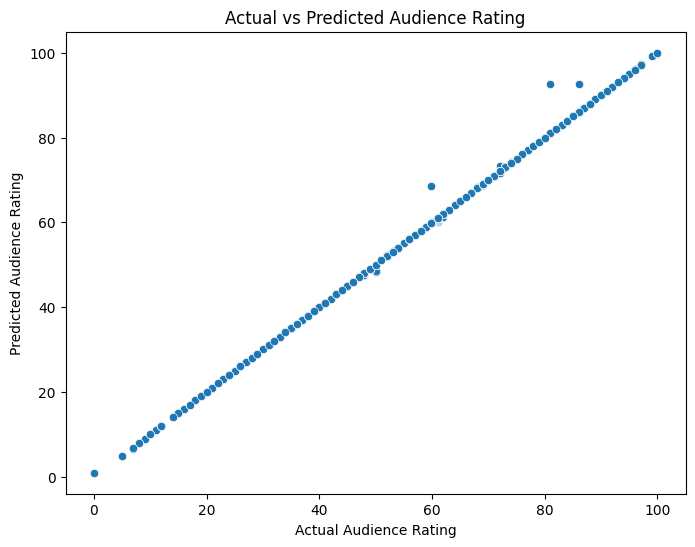

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Audience Rating')
plt.ylabel('Predicted Audience Rating')
plt.title('Actual vs Predicted Audience Rating')
plt.show()

Both Actual and Predicted values align closely to the diagonal line which indicates the actual and predicted values are similar and the model is performing well. 

### Residual Plot

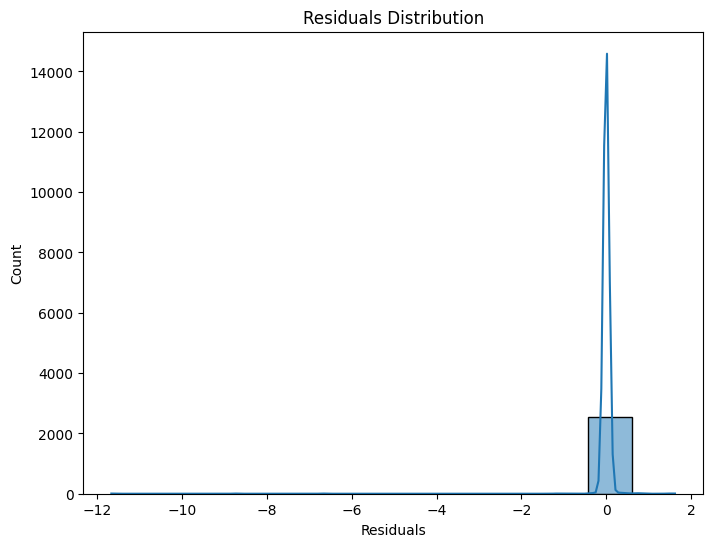

In [50]:
# Plotting residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

This visualises the distribution of errors. It has narrow spread and centered around zero which indicates the model has minimal errors.

## Result

The created Random Forest Regressor model has R2 Score of 0.9990 indicating that 99.9% of the variance in the target variable is explained by the model, which reflects excellent performance and MSE of 0.4104 which indicates that the average squared difference between the actual and predicted values is very low and has minimal error in predictions.

## Limitations

- The dataset contained some highly skewed data in some column. The skewness of the 'release_date_year' column isn't in a desirable range.

- The outliers weren't completely removed from some columns. It didn't affect the model performance much as we chose an ensemble model

- Some columns had high cardinality which makes to difficult to understand the impact on the target variable

## Conclusion

The aim was to create a robust machine learning model that could predict 'audience_rating' from the rest of the avaiable features. Null values and outliers were treated accordingly. The dataset then was scaled and encoded before splitting to independent features x and dependent y. After that the data was used for model training and we chose Random Forest Regressor so that its less sensitive to outiers. We got 0.9990 R2 Score and 0.4104 MSE which indicates high model performance.

## Future Work

- Performing various feature selection methods like Recursive Feature Elimination or KBest which can improve the model performance.

- Performing Hyperparameter Tuning can optimize model's hyperparameters for better performance

- Experiment with other models and also try ensemble techniques(combine models)